In [21]:
# Models?

# Linear Regression, Random Forest, LSTM, Graph Neural Networks, Deep Reinforcement Learning?

Combinatorial K-Fold CV?

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('financial_statements_enhanced.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Ticker                                 9 non-null      object 
 1   Date                                   9 non-null      int64  
 2   Assets                                 9 non-null      float64
 3   Current Ratio                          9 non-null      float64
 4   Debt to Equity Ratio                   9 non-null      float64
 5   Return on Assets                       9 non-null      float64
 6   Return on Equity                       9 non-null      float64
 7   Profit Margin                          9 non-null      float64
 8   Operating Margin                       9 non-null      float64
 9   Revenue Growth                         9 non-null      float64
 10  Current Ratio Growth                   9 non-null      float64
 11  Debt to Eq

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,9.0,2.023090e+05,86.641503,202206.000000,202212.000000,202309.000000,202406.000000,202412.000000
Assets,9.0,2.467162e-17,1.000000,-1.398877,-1.139598,0.365781,0.445558,1.406029
Current Ratio,9.0,1.427352e+00,0.437579,0.867313,0.988012,1.531956,1.769167,2.024912
Debt to Equity Ratio,9.0,2.362964e+00,2.267695,0.656759,0.793934,0.997721,4.673462,5.961537
Return on Assets,9.0,1.903546e-01,0.072627,0.058090,0.152493,0.175644,0.256825,0.282924
Return on Equity,9.0,7.664199e-01,0.733066,0.096240,0.273563,0.350887,1.560760,1.969589
Profit Margin,9.0,2.439386e-01,0.102174,0.072587,0.154971,0.253062,0.341462,0.366863
Operating Margin,9.0,2.814303e-01,0.141243,0.072433,0.167636,0.302887,0.417729,0.446443
Revenue Growth,9.0,6.919395e-02,0.075237,-0.028005,0.009476,0.068820,0.112760,0.187953
Current Ratio Growth,9.0,2.208273e-03,0.157128,-0.279347,-0.122164,0.000700,0.126595,0.173254


Text(0.5, 1.0, 'Feature Correlation Heatmap')

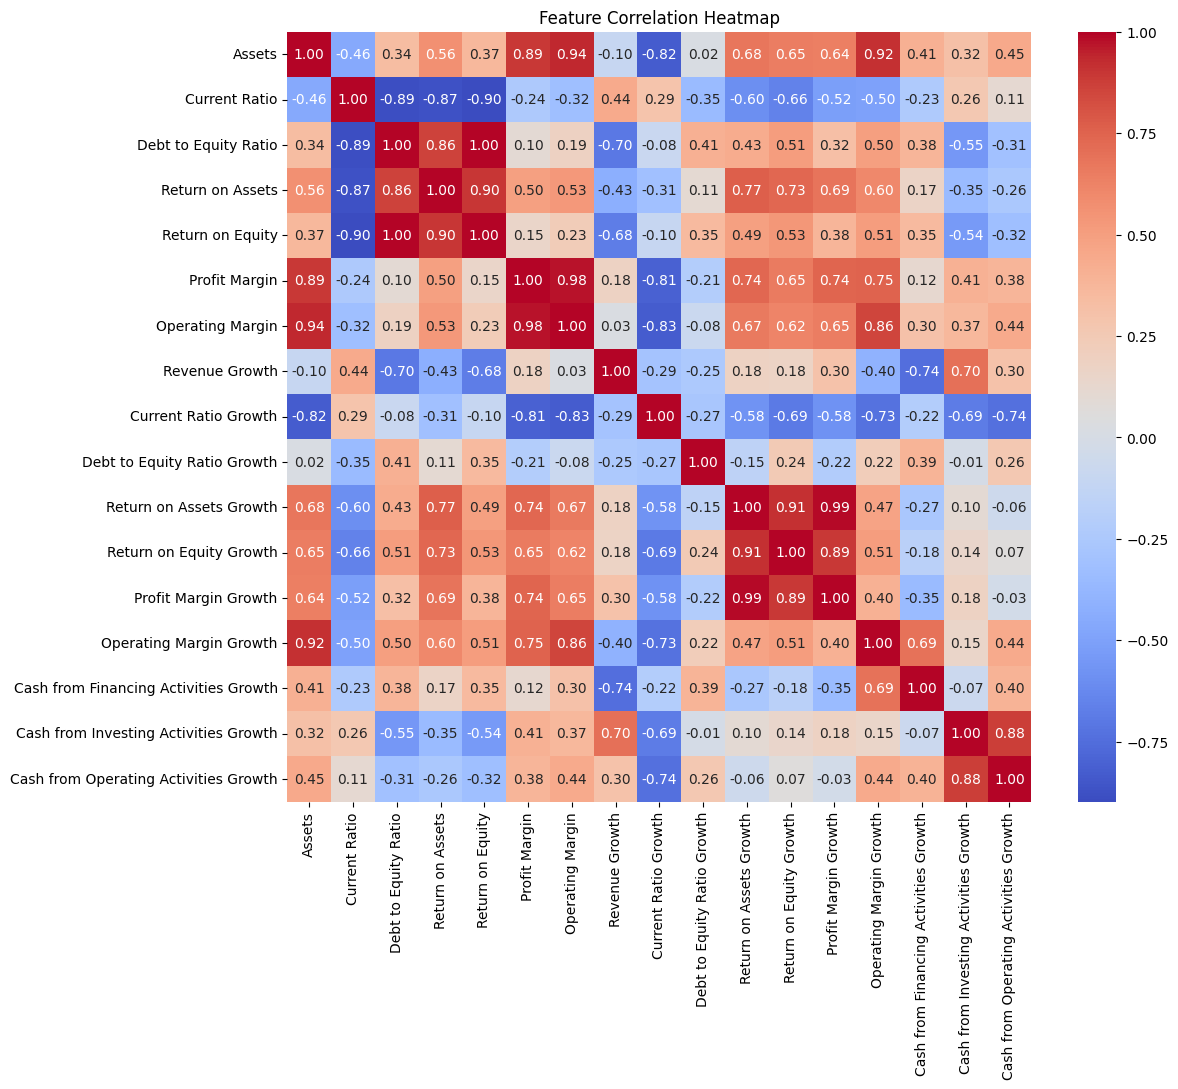

In [25]:
# plot correlation heatmap
cols = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

In [26]:
# # drop highly correlated features
# df = df.drop(columns=['Profit Margin', 'Operating Margin', 'Operating Margin Growth', 'Current Ratio Growth', 'Profit Margin Growth', 'Return on Equity Growth', 'Cash from Investing Activities Growth', 'Return on Equity'])
# df

In [27]:
# # plot correlation heatmap
# cols = df.select_dtypes(include=['float64']).columns
# plt.figure(figsize=(12, 10))
# sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Feature Correlation Heatmap')

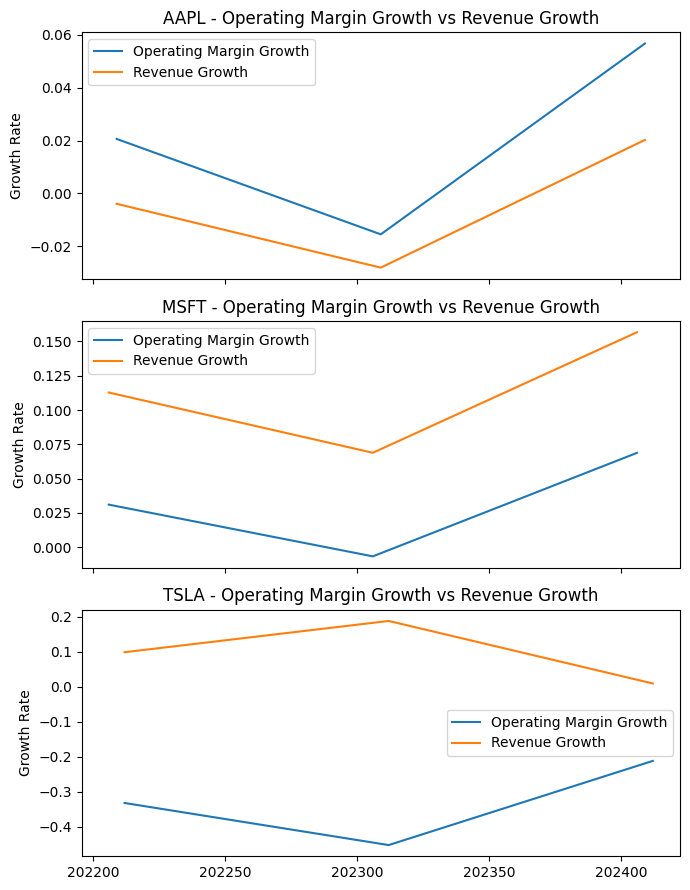

In [31]:
# compare operating margin growth to revenue growth over time for each company in a different plot using subplots
tickers = df['Ticker'].unique()
fig, axs = plt.subplots(len(tickers), 1, figsize=(7, 3 * len(tickers)), sharex=True)
for i, ticker in enumerate(tickers):
    company_data = df[df['Ticker'] == ticker]
    axs[i].plot(company_data['Date'], company_data['Operating Margin Growth'], label='Operating Margin Growth')
    axs[i].plot(company_data['Date'], company_data['Revenue Growth'], label='Revenue Growth')
    axs[i].set_title(f'{ticker} - Operating Margin Growth vs Revenue Growth')
    axs[i].set_ylabel('Growth Rate')
    axs[i].legend()

plt.tight_layout()
plt.show()